In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
from implementations import *

DATA_TRAIN_PATH = 'data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

#comment for raw data
tX = remove_wrong_columns(tX)

In [3]:
tX_stdzed, tX_mean, tX_std = standardize(tX)

In [4]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    return np.vander(x, degree+1, True)

def ridge_cross_validation(y, x, k_indices, k, lambda_, degree):
    train_y, train_x, test_y, test_x = np.array([]), np.array([]), np.array([]), np.array([])
    
    for k_ in range(len(k_indices)):
        temp_y = y.take(k_indices[k_])
        temp_x = x.take(k_indices[k_])
        
        if k_ != k:
            train_y = np.concatenate((train_y, temp_y))
            train_x = np.concatenate((train_x, temp_x))
        else:
            test_y = np.concatenate((test_y, temp_y))
            test_x = np.concatenate((test_x, temp_x))
    
    train_poly = build_poly(train_x, degree)
    test_poly = build_poly(test_x, degree)
    
    w, loss_tr = ridge_regression(train_y, train_poly, lambda_)
    loss_te = compute_loss(mse, test_y, test_poly, w)
    
    return loss_tr, loss_te

In [5]:
import matplotlib.pyplot as plt


def cross_validation_visualization(lambds, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")

In [6]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [7]:
def cross_validation_demo(l_min, l_max, degree):
    seed = 1
    k_fold = 5
    lambdas = np.logspace(-l_min, -l_max, 50)
    k_indices = build_k_indices(y, k_fold, seed)
    rmse_tr = []
    rmse_te = []
    
    te_min = (np.NaN, np.Inf)
    
    for l in lambdas:
        tr_avg = 0
        te_avg = 0
        
        for k_ in range(k_fold):
            loss_tr, loss_te = ridge_cross_validation(y, tX_stdzed, k_indices, k_, l, degree)
            
            tr_avg += loss_tr
            te_avg += loss_te
            
        rmse_tr.append(tr_avg/k_fold)
        
        temp_rmse_te = te_avg/k_fold
        rmse_te.append(temp_rmse_te)
        
        if temp_rmse_te < te_min[1]:
            te_min = (l, temp_rmse_te)
            
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    print(te_min)

(1.264855216855301e-05, 0.4504965835389251)


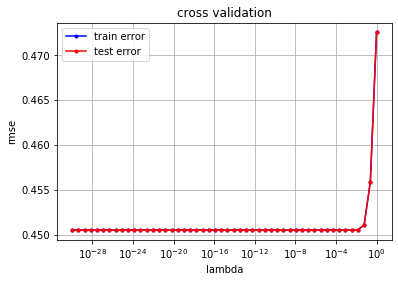

In [8]:
cross_validation_demo(30, 0, 0)

(1e-05, 0.45049658354646904)


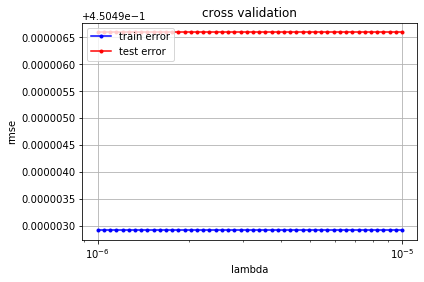

In [20]:
cross_validation_demo(6, 5, 0)

(1.264855216855301e-05, 0.45049609588083894)


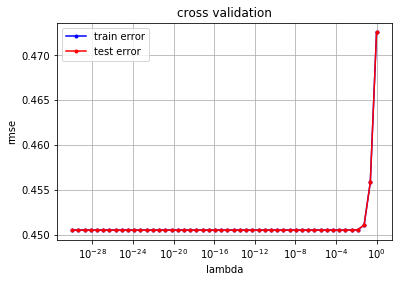

In [9]:
cross_validation_demo(30, 0, 1)

(2.4420530945486497e-05, 0.45049609585060296)


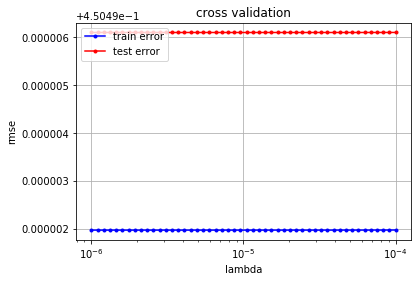

In [21]:
cross_validation_demo(6, 4, 1)

(1e-30, 0.45050189053910283)


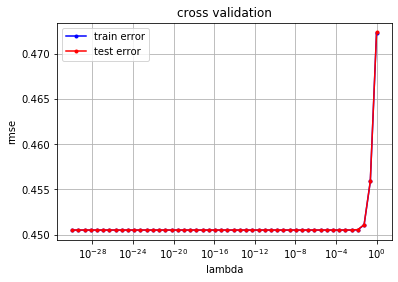

In [10]:
cross_validation_demo(30, 0, 2)

(0.00021209508879201926, 0.45050458320961617)


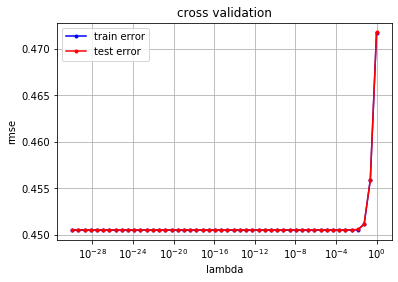

In [11]:
cross_validation_demo(30, 0, 3)

(0.00013894954943731373, 0.45050458216487177)


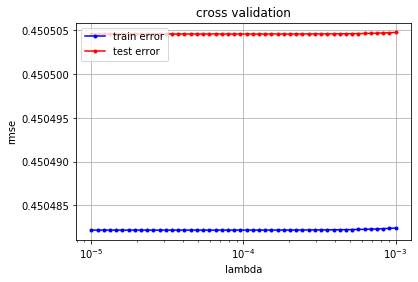

In [22]:
cross_validation_demo(5, 3, 3)

(0.00021209508879201926, 0.45051070234605983)


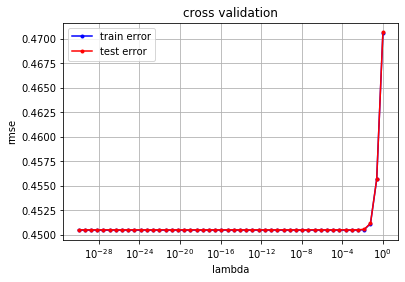

In [12]:
cross_validation_demo(30, 0, 4)

(0.000471486636345739, 0.4505106841152034)


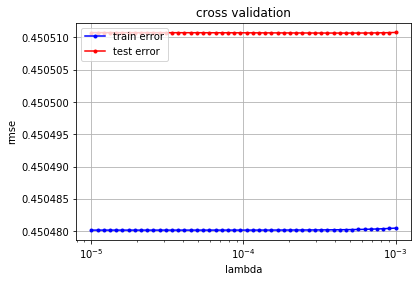

In [23]:
cross_validation_demo(5, 3, 4)

(0.00021209508879201926, 0.45051314607628523)


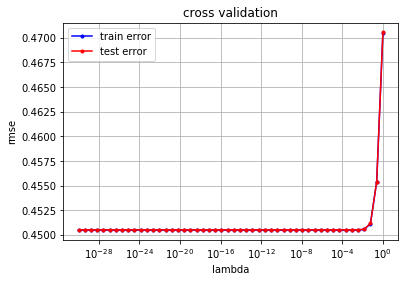

In [13]:
cross_validation_demo(30, 0, 5)

(0.00035564803062231287, 0.4505131367230919)


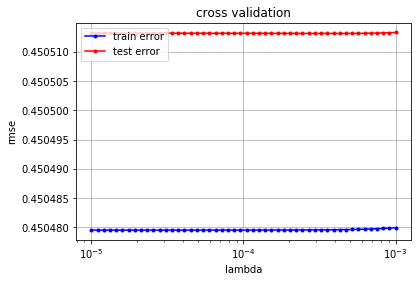

In [24]:
cross_validation_demo(5, 3, 5)

(3.39322177189533e-14, 0.45052826465149665)


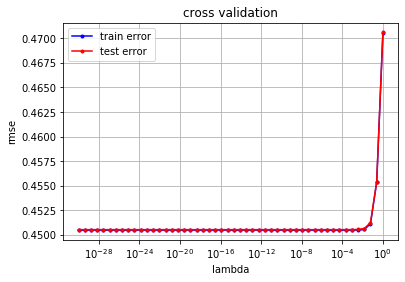

In [14]:
cross_validation_demo(30, 0, 6)

(3.906939937054621e-14, 0.4505282646511109)


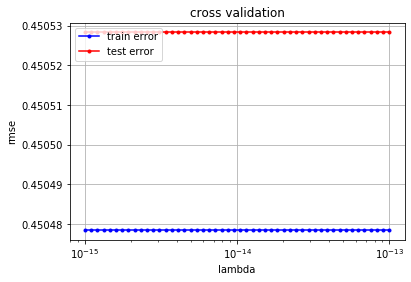

In [25]:
cross_validation_demo(15, 13, 6)

(0.0035564803062231214, 0.4505037841895767)


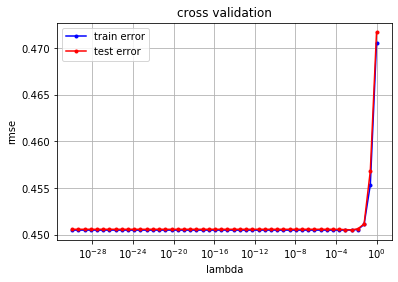

In [15]:
cross_validation_demo(30, 0, 7)

(0.0032374575428176433, 0.4505031753074344)


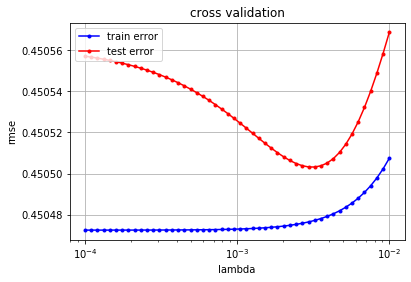

In [26]:
cross_validation_demo(4, 2, 7)

(0.05963623316594661, 0.4535906759836819)


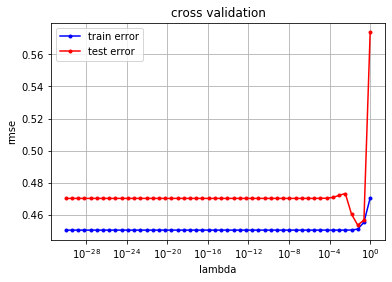

In [16]:
cross_validation_demo(30, 0, 8)

(0.03556480306223128, 0.4508150588521976)


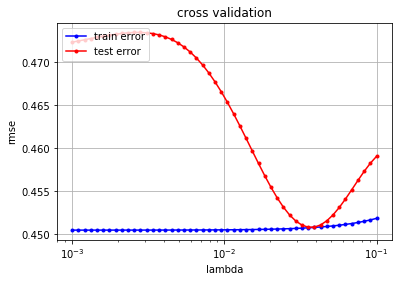

In [27]:
cross_validation_demo(3, 1, 8)

(0.000868511373751352, 0.7800766673127787)


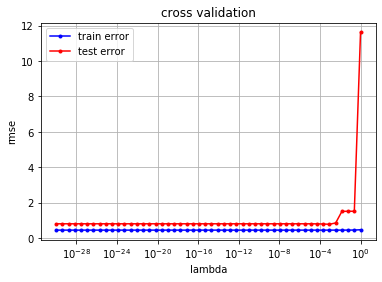

In [18]:
cross_validation_demo(30, 0, 9)

(0.05963623316594661, 69.56790926093579)


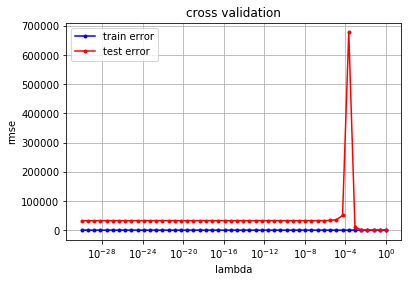

In [19]:
cross_validation_demo(30, 0, 10)

## Generate predictions and save ouput in csv format for submission:

In [34]:
DATA_TRAIN_PATH = 'data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

DATA_TEST_PATH = 'data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

#comment for raw data
tX = remove_wrong_columns(tX)
tX_test = remove_wrong_columns(tX_test)

In [35]:
tX_stdzed, tX_test_stdzed = standardize_train_and_test(tX, tX_test)

#lambda_ = 0.0032374575428176433
#degree  = 7

lambda_ = 0.00035564803062231287
degree  = 5

poly_tX_stdzed = expand_features_polynomial(tX_stdzed, degree)
poly_tX_test_stdzed = expand_features_polynomial(tX_test_stdzed, degree)

w, _ = ridge_regression(y, poly_tX_stdzed, lambda_)

In [36]:
OUTPUT_PATH = 'data/danielementary_ridge.csv'
y_pred = predict_labels(w, poly_tX_test_stdzed)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)